# Evaluating derivatives

Derivatives are frequently used in optimization, machine learning and statistical inference. For example, we can find function minima and maxima much faster if derivatives are available. But how can we compute derivatives?

## Symbolic differentiation

We can write (or use) a library which differentiates expressions symbolically.

In [1]:
import sympy as sym

ModuleNotFoundError: No module named 'sympy'

In [602]:
x = sym.Symbol('x')
print(sym.diff(sym.log(x)*sym.exp(x), x))

exp(x)*log(x) + exp(x)/x


In [603]:
print(sym.diff((sym.log(x) + sym.exp(x))/(sym.log(x)*sym.exp(x)), x))

(exp(x) + 1/x)*exp(-x)/log(x) - (exp(x) + log(x))*exp(-x)/log(x) - (exp(x) + log(x))*exp(-x)/(x*log(x)**2)


However, the size of the derivative can grow very fast (expression swell):

In [604]:
print(sym.diff(x*(sym.log(x) + sym.exp(x))/(sym.log(x)*sym.exp(x)), x))

x*(exp(x) + 1/x)*exp(-x)/log(x) - x*(exp(x) + log(x))*exp(-x)/log(x) + (exp(x) + log(x))*exp(-x)/log(x) - (exp(x) + log(x))*exp(-x)/log(x)**2


In [605]:
print(sym.diff((x*(sym.log(x) + sym.exp(x))/(sym.log(x)*sym.exp(x)))**x, x))

(x*(exp(x) + log(x))*exp(-x)/log(x))**x*(log(x*(exp(x) + log(x))*exp(-x)/log(x)) + (x*(exp(x) + 1/x)*exp(-x)/log(x) - x*(exp(x) + log(x))*exp(-x)/log(x) + (exp(x) + log(x))*exp(-x)/log(x) - (exp(x) + log(x))*exp(-x)/log(x)**2)*exp(x)*log(x)/(exp(x) + log(x)))


## Automatic differentiation

Automatic differentiation is a programming technique which can compute the derivative of any function, including functions with conditionals, loops, and recursion.

In [606]:
import jax   #  a Python library from Google for automatic differentiation
from random import random
import jax.numpy as np
import matplotlib.pyplot as plt

Let's algorithmically differentiate the same function.

In [609]:
def foo(x):
  a = np.log(x)
  b = np.exp(x)
  return (x*(a + b)/(a*b))**x

In [610]:
dfoo = jax.grad(foo)

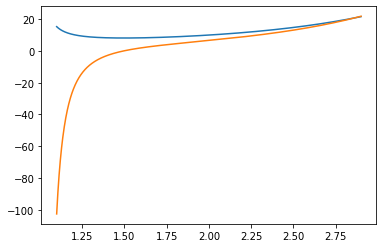

In [611]:
x = np.linspace(1.1, 2.9, 1000)
plt.plot(x, [foo(x) for x in x])
plt.plot(x, [dfoo(x) for x in x])

## Gradient based optimization

### Gradient descent

$$x \leftarrow x - f'(x) \delta$$

In [ ]:
def gd(f, x0, step=0.1, decay=0.995, niter=1000):
  """approximates minimum of f starting from x0
  """
  df = jax.grad(f)
  x = x0
  for i in range(niter):
    x -= df(x)*step
    step *= decay
  return x

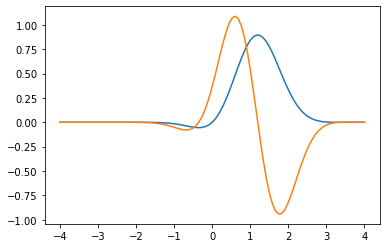

In [ ]:
def foo(x):
  a = np.exp(-(x-1)**2)
  b = np.sin(x)
  return a*b

dfoo = jax.grad(foo)

x = np.linspace(-4, 4, 100)
plt.plot(x, [(foo(x), dfoo(x)) for x in x])

In [ ]:
x = gd(foo, 0.1*(random()-0.5))
print(f"x={x:.3f} foo({x:.3f})={foo(x):.3f}")

x=-0.352 foo(-0.352)=-0.055


### Newton's method

$$x = x - \frac {f''(x)} {f'(x)}$$

In [ ]:
def newton(f, x0, niter=10):
  df = jax.grad(f)
  ddf = jax.grad(df)
  x = x0
  for i in range(niter):
    x = x - df(x)/ddf(x)
  return x

In [ ]:
x = newton(foo, 0.1*(random()-0.5), niter=10)
print(f"x={x:.3f} foo({x:.3f})={foo(x):.3f}")

x=-0.354 foo(-0.354)=-0.055


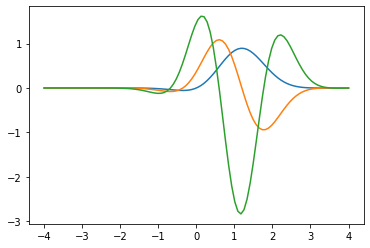

In [ ]:
ddfoo = jax.grad(dfoo)

x = np.linspace(-4, 4, 100)
_ = plt.plot(x, [(foo(x), dfoo(x), ddfoo(x)) for x in x])

## Application to machine learning

### Linear regression

In [ ]:
municipalities = np.array([(441976, 2359), (309912, 1311), (35821, 14), (1064523, 31664), (50022, 99), (94194, 219), (1118363, 104246), (766247, 2009), (59246, 147), (96671, 271), (293166, 5864), (24842, 63), (275797, 3920), (255611, 670), (41512, 133), (75471, 235), (34456, 13), (98014, 312), (279091, 1299), (211264, 197), (79595, 410), (168959, 60), (169312, 791), (216749, 293), (106626, 172), (150191, 334), (49265, 189), (884039, 1675), (140857, 179), (73957, 226), (244515, 256), (73131, 36), (12603, 7), (48506, 448), (50863, 551), (136575, 1167), (136690, 194), (139017, 24), (246157, 4046), (41822, 117), (31105, 65), (402087, 1614), (740243, 501), (207791, 151), (18121, 218), (171057, 580), (359594, 6872), (152634, 514), (30140, 69), (76103, 2421), (135252, 510), (367552, 4688), (58093, 163), (134205, 337), (12236, 6), (75847, 230), (148942, 1450), (98733, 960), (106797, 272), (813137, 4436), (235134, 3393), (14560, 23), (315429, 1446), (289005, 1413), (576211, 6947), (340761, 697), (287344, 827), (146912, 356), (38384, 89), (112529, 911), (35154, 41), (52997, 167), (613572, 2031), (401093, 1082), (166448, 87), (44096, 104), (39067, 79), (100361, 294), (394099, 872), (52341, 142), (298666, 378), (90943, 524), (8125, 14), (34134, 292), (29867, 13), (43846, 562), (1254812, 17713), (33761, 92), (169031, 612), (990827, 15279), (229676, 1517), (38409, 777), (199770, 666), (142900, 851), (155468, 239), (438265, 1960), (37765, 57), (66980, 63), (70981, 162), (504659, 1570)])

Text(0, 0.5, 'number of cases')

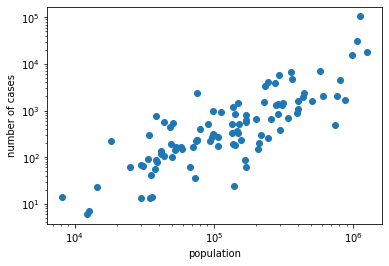

In [ ]:
populations = municipalities[:, 0]
cases = municipalities[:, 1]
plt.scatter(populations, cases)
plt.xscale("log")
plt.xlabel("population")
plt.yscale("log")
plt.ylabel("number of cases")

In [612]:
def loss(a):
  """computes square loss of linear regression.
  """
  # we could write a loop here, but that would be too slow for optimization
  err = np.log(cases) - a[0]*np.log(populations) - a[1]
  return np.mean(err*err)

In [618]:
a = gd(loss, np.array([1., np.log(np.sum(cases)/np.sum(populations))]), step=0.01, decay=0.99, niter=100)
print(f"log(c)={a[0]:.3f}*log(p){a[1]:+.3f}")

log(c)=0.899*log(p)-4.517


Text(0, 0.5, 'log(cases)')

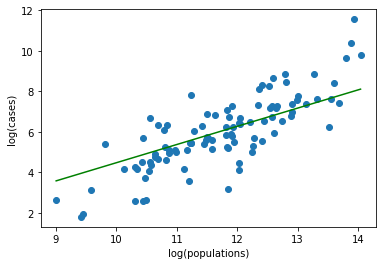

In [619]:
plt.scatter(np.log(populations), np.log(cases))
x = np.linspace(min(np.log(populations)), max(np.log(populations)), 100)
plt.plot(x, a[0]*x + a[1],  color="green")
plt.xlabel("log(populations)")
plt.ylabel("log(cases)")